In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten,BatchNormalization
import numpy as np
from keras.utils import to_categorical

In [22]:
N, D, H1, H2, C = 300, 150, 20, 30, 10
X = np.random.randn(N, 150)
y = to_categorical(np.random.randint(C, size=(N,)))
print(X.shape)
print(y.shape)

(300, 150)
(300, 10)


In [34]:
model = Sequential()
model.add(Dense(20, input_dim=150))
model.add(Activation('sigmoid'))
model.add(Dense(30))
model.add(Activation('sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 20)                3020      
_________________________________________________________________
activation_19 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 30)                630       
_________________________________________________________________
activation_20 (Activation)   (None, 30)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                310       
Total params: 3,960
Trainable params: 3,960
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Fit the model
history = model.fit(X, y, epochs=50, batch_size=10)

Epoch 1/50
300/300 [==============================] - 0s 1ms/step - loss: 2.4228 - acc: 0.0767 
Epoch 2/50
300/300 [==============================] - 0s 103us/step - loss: 2.3296 - acc: 0.1067
Epoch 3/50
300/300 [==============================] - 0s 83us/step - loss: 2.2907 - acc: 0.1467
Epoch 4/50
300/300 [==============================] - 0s 103us/step - loss: 2.2726 - acc: 0.1400
Epoch 5/50
300/300 [==============================] - 0s 90us/step - loss: 2.2579 - acc: 0.1700
Epoch 6/50
300/300 [==============================] - 0s 86us/step - loss: 2.2464 - acc: 0.1767
Epoch 7/50
300/300 [==============================] - 0s 96us/step - loss: 2.2366 - acc: 0.1800
Epoch 8/50
300/300 [==============================] - 0s 93us/step - loss: 2.2230 - acc: 0.2400
Epoch 9/50
300/300 [==============================] - 0s 96us/step - loss: 2.2083 - acc: 0.2367
Epoch 10/50
300/300 [==============================] - 0s 93us/step - loss: 2.1947 - acc: 0.2533
Epoch 11/50
300/300 [================

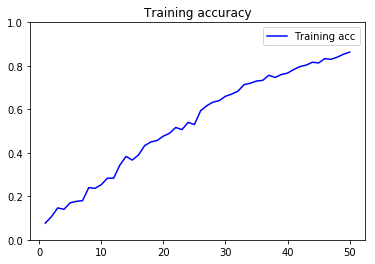

In [36]:

import matplotlib.pyplot as plt
acc_fc = history.history["acc"] # Training accuracy
loss = history.history["loss"] # Training loss
epochs = range(1, len(acc_fc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc_fc, "b", label = "Training acc") # "bo" gives dot plot
plt.title("Training accuracy")
plt.ylim((0,1))
plt.legend()

plt.show()



In [37]:
model = Sequential()
model.add(Dense(20, input_dim=150))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dense(30))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# Fit the model
history = model.fit(X, y, epochs=50, batch_size=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 20)                3020      
_________________________________________________________________
batch_normalization_7 (Batch (None, 20)                80        
_________________________________________________________________
activation_21 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 30)                630       
_________________________________________________________________
batch_normalization_8 (Batch (None, 30)                120       
_________________________________________________________________
activation_22 (Activation)   (None, 30)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                310       
Total para

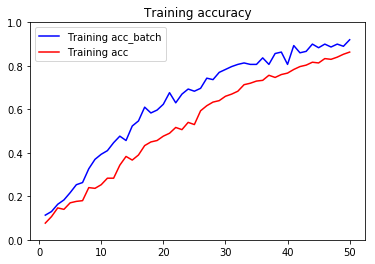

In [38]:

import matplotlib.pyplot as plt
acc = history.history["acc"] # Training accuracy
epochs = range(1, len(acc) + 1) #plots every epoch, here 10
plt.plot(epochs, acc, "b", label = "Training acc_batch") # "bo" gives dot plot
plt.plot(epochs, acc_fc, "r", label = "Training acc") # "bo" gives dot plot
plt.title("Training accuracy")
plt.ylim((0,1))
plt.legend()
plt.savefig('comparison.png')
plt.show()
